## Get Tweets

In [2]:
from twitterscraper import query_tweets
from datetime import timedelta, date
import pandas as pd
import csv
import gc
%matplotlib inline

In [44]:
def twitter_query(query, start_date, end_date,limit_per_day=100):
    
    query = query_tweets(query=query, 
                     limit=limit_per_day,
                     begindate=start_date, 
                     enddate=end_date, 
                     poolsize=20, 
                     lang='en')
    return query

In [4]:
def create_list(query):    
    tweets = []
    for tweet in query:
        tweets.append({'date': tweet.timestamp, 'text': tweet.text, 
                   'fullname': tweet.fullname, 'id': tweet.id, 
                   'likes': tweet.likes, 'replies': tweet.replies,
                   'retweets': tweet.retweets, 'url': tweet.url,
                   'user': tweet.user})
    return tweets

In [5]:
def add_to_list(query):
    for tweet in query:
        tweets.append({'date': tweet.timestamp, 'text': tweet.text, 
                   'fullname': tweet.fullname, 'id': tweet.id, 
                   'likes': tweet.likes, 'replies': tweet.replies,
                   'retweets': tweet.retweets, 'url': tweet.url,
                   'user': tweet.user})
    return tweets

### Query

In [120]:
query = '#releasethememo'
day = 1
start_date = date(2018, 1, day)
start_date_alt = date(2018, 1, day+1)
end_date = date(2018, 3, 1)
filename = 'scrape_frb_0117_0318'

evenquery = twitter_query(query, start_date, end_date)
oddquery = twitter_query(query, start_date_alt, end_date)

In [121]:
#tweets = create_list(evenquery)

In [122]:
if len(tweets) > 0:
    tweets = add_to_list(oddquery)
    tweets = add_to_list(evenquery)

## Pre-process Tweets

In [123]:
def pre_process(tweets):
    df = pd.DataFrame(tweets)
    print("Initial dataframe length: ", len(df))
    
    # add timestamp column
    df['month'] = df['date'].apply(lambda x : date(x.year, x.month, 1))
    # drop NAs
    df = df.dropna()
    # drop duplicates
    df = df.drop_duplicates()
    
    df['text'] = df['text'].apply(str)
    
    print("# of Unique ID's: ", len(df.id.unique()))
    print("Final dataframe length: ", len(df))
    return df

In [124]:
df = pre_process(tweets)

Initial dataframe length:  8707
# of Unique ID's:  1289
Final dataframe length:  1300


In [125]:
path = 'twitter_data/ian_scraped_tweets/'+filename
with open(path, 'a') as f:
             (df).to_csv(f, header=False)



In [96]:
# drop values outside of queried range
#df = df[df['date'] >= start_date]
#df = df[df['date'] <= end_date]

In [97]:
len(df.id)

1145

### Check that tweets look normal, ready for export

In [13]:
df.sort_values('date').head(3)

,date,fullname,id,likes,replies,retweets,text,url,user,month
349,2017-01-05 21:55:37,Caroline O.,817127438727708677,924,29,821,1) GOP will claim that they're defunding Plann...,/RVAwonk/status/817127438727708677,RVAwonk,2017-01-01
354,2017-02-11 21:14:19,David Me,830525394386374659,13,0,10,Abortion is to health care as Auschwitz is to ...,/RebootingDavid/status/830525394386374659,RebootingDavid,2017-02-01
350,2017-02-11 21:20:34,Boca Vista,830526967027998720,97,12,89,#1 KILLER of Black people\n\nAbortion\n\n#1 su...,/bocavista2016/status/830526967027998720,bocavista2016,2017-02-01


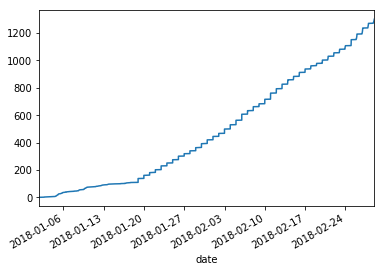

In [119]:
df.groupby('date')['text'].count().cumsum().plot()

In [15]:
#df.to_csv('twitter_data/ian_scraped_tweets/'+filename)
